In [18]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import cm
import math
from matplotlib.patches import Circle
import mpl_toolkits.mplot3d.art3d as art3d
import time
%matplotlib notebook

<IPython.core.display.Javascript object>


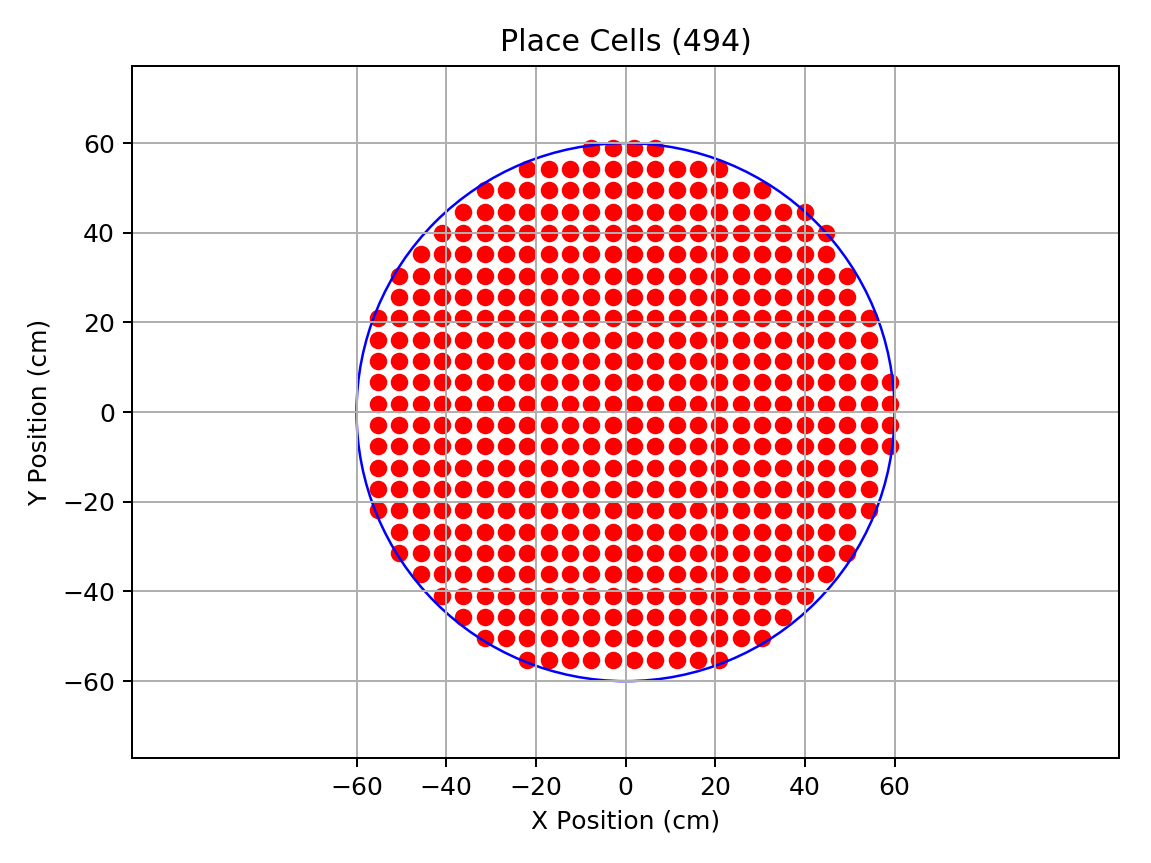

In [19]:
####################################################################################################
# Place Cells Initialization
####################################################################################################

x=[]
y=[]

inside=0
outside=0

x_range=np.arange(-60, 61, 4.760)
y_range=np.arange(-60, 61, 4.760)



for i in x_range:
        for j in y_range:
            
            if (i**2+j**2>=60**2):
                outside=outside+1
            else:
        
                inside=inside+1
                x.append(i)
                y.append(j)
                
                
merge=list(zip(x,y))
merge=np.array(merge)


radius=60
fig = plt.figure()
ax = fig.gca()
    
pool=plt.Circle((0, 0), 60, fill=False, color='b', ls='-')
ax.add_artist(pool)
ax.axis('equal')


ax.set_xlim((-radius-50, radius+50))
ax.set_ylim((-radius-50, radius+50))
plt.xticks(np.arange(-radius, radius+20, step=20))
plt.yticks(np.arange(-radius, radius+20, step=20))

ax.set_xlabel('X Position (cm)')
ax.set_ylabel('Y Position (cm)')

ax.scatter(x, y, color='r')

ax.set_title("Place Cells (494)")

plt.grid(True)
plt.tight_layout()

   
plt.show()


In [20]:
####################################################################################################
# Important Methods
####################################################################################################

def cell_firing(position, place_field, sigma):
    return np.exp(-((np.linalg.norm(position-place_field))**2 /(2*sigma**2)))

In [21]:
####################################################################################################
# Watermaze Module(Modified)
####################################################################################################

class watermaze(object):
    
    """
    This class defines a set of functions for simulating a rat moving in a water-maze.
    
    For the purposes of this assignment, you should be using the move function to 
    determine the next state of the environment at each time-step of the simulation.
    
    See the demo of its usage after the module code.
    """
    
    ####################################################################
    # the initialization function, measurements are in cm
    
    def __init__(self, pool_radius=60, platform_radius=10, platform_location=np.array([[25],[25]]), 
                 stepsize=5.0, momentum=0.2, T=250):
        
        
        """
        The init function for the watermaze module.
        
        - The pool_radius argument specifies the radius of the pool.
        
        - The platform_radius argument specifies the radius of the platform.
        
        - The platform_location argument specifies the location of the platform centre.
        
        - The stepsize argument specifies how far the rat moves in one step.
        
        - The momentum argument specifies the ratio of old movement to new movement direction (i.e. 
        momentum = 0 means all new movement, momentum = 1 means all old movement, otherwise a mix.
        
        - The T argument is the maximum time for a trial in the pool.

        
        """
        
        # store the given info
        self.radius            = pool_radius
        self.platform_radius   = platform_radius
        self.platform_location = platform_location
        self.stepsize          = stepsize
        self.momentum          = momentum
        self.T                 = T
        
        # a dictionary for calculating directions
        self.direction = {
            0:  np.pi/2, #north
            1:  np.pi/4, #north-east
            2:  0, #east
            3:  7*np.pi/4, #south-east
            4:  3*np.pi/2, #south
            5:  5*np.pi/4, #south-west
            6:  np.pi, #west
            7:  3*np.pi/4, #north-west
        }
        
        # initialize the dynamic variables
        self.position = np.zeros((2,T))
        self.t        = 0
        self.prevdir  = np.zeros((2,))
        
        self.activity=np.zeros(len(merge))
        
    ####################################################################
    
    
    # for updating the rat's position in the pool
    def move(self, A):

        """
        Updates the simulated rat's position in the water-maze environment by moving it in the 
        specified direction. 
        
        - The argument A is the last selected action, and must be an integer from 0-7, with 0 indicating N, 
        1 indicating NE, etc. 

        """
        
        # check the A argument
        if (not np.isin(A, np.arange(8))):
            print('Error: The argument A must be an integer from 0-7, indicating which action was selected.')

        # determine the vector of direction of movement
        angle = self.direction[A]
        newdirection = np.array([np.cos(angle), np.sin(angle)])
        
        # add in momentum to reflect actual swimming dynamics (and normalize, then multiply by stepsize)
        direction = (1.0 - self.momentum)*newdirection + self.momentum*self.prevdir
        direction = direction/np.sqrt((direction**2).sum())
        direction = direction*self.stepsize
        
        # update the position, prevent the rat from actually leaving the water-maze by having it "bounce" off the wall 
        [newposition, direction] = self.poolreflect(self.position[:,self.t] + direction)

        # if we're now at the very edge of the pool, move us in a little-bit
        if (np.linalg.norm(newposition) == self.radius):
            newposition = np.multiply(np.divide(newposition,np.linalg.norm(newposition)),(self.radius - 1))

        # update the position, time (and previous direction)
        self.position[:,self.t+1] = newposition
        
        
        self.coordinate=newposition

    
        
        self.activity=(np.array([cell_firing(position=np.array(newposition), place_field=np.array(list), sigma=0.16) for list in merge]))
    
        self.t                    = self.t + 1
        self.prevdir              = direction
        
        return self.activity
    
    
    def potentialMoves(self):
        
        """
        Updates the simulated rat's position in the water-maze environment by moving it in the 
        specified direction. 
        
        - The argument A is the last selected action, and must be an integer from 0-7, with 0 indicating N, 
        1 indicating NE, etc. 

        """
        
        activities=[]
        coordinates=[]

        
        for i in range(8):
        # check the A argument
            if (not np.isin(i, np.arange(8))):
                print('Error: The argument A must be an integer from 0-7, indicating which action was selected.')

        # determine the vector of direction of movement
            angle = self.direction[i]
            newdirection = np.array([np.cos(angle), np.sin(angle)])
        
        # add in momentum to reflect actual swimming dynamics (and normalize, then multiply by stepsize)
            direction = (1.0 - self.momentum)*newdirection + self.momentum*self.prevdir
            direction = direction/np.sqrt((direction**2).sum())
            direction = direction*self.stepsize
        
        # update the position, prevent the rat from actually leaving the water-maze by having it "bounce" off the wall 
            [newposition, direction] = self.poolreflect(self.position[:,self.t] + direction)

        # if we're now at the very edge of the pool, move us in a little-bit
            if (np.linalg.norm(newposition) == self.radius):
                newposition = np.multiply(np.divide(newposition,np.linalg.norm(newposition)),(self.radius - 1))
    
        # update the position, time (and previous direction)
        
            newposition
            coordinates.append(newposition)
            activity=(np.array([cell_firing(position=np.array(newposition), place_field=np.array(list), sigma=0.16) for list in merge]))
            
            activities.append(activity)
            
        
        return activities
        
    ####################################################################
    # for bouncing the rat off the wall of the pool
    def poolreflect(self, newposition):
        
        """
        The poolreflect function returns the point in space at which the rat will be located if it 
        tries to move from the current position to newposition but bumps off the wall of the pool. 
        If the rat would not bump into the wall, then it simply returns newposition. The function 
        also returns the direction the rat will be headed.
        """

        # determine if the newposition is outside the pool, if not, just return the new position
        if (np.linalg.norm(newposition) < self.radius):
            refposition  = newposition
            refdirection = newposition - self.position[:,self.t]

        else:

            # determine where the rat will hit the pool wall
            px = self.intercept(newposition)
            
            # get the tangent vector to this point by rotating -pi/2
            tx = np.asarray(np.matmul([[0, 1], [-1, 0]],px))

            # get the vector of the direction of movement
            dx = px - self.position[:,self.t]
            
            # get the angle between the direction of movement and the tangent vector
            theta = np.arccos(np.matmul((np.divide(tx,np.linalg.norm(tx))).transpose(),(np.divide(dx,np.linalg.norm(dx))))).item()

            # rotate the remaining direction of movement vector by 2*(pi - theta) to get the reflected direction
            ra = 2*(np.pi - theta)
            refdirection = np.asarray(np.matmul([[np.cos(ra), -np.sin(ra)], [np.sin(ra), np.cos(ra)]],(newposition - px)))

            # get the reflected position
            refposition = px + refdirection

        # make sure the new position is inside the pool
        if (np.linalg.norm(refposition) > self.radius):
            refposition = np.multiply((refposition/np.linalg.norm(refposition)),(self.radius - 1))

        return [refposition, refdirection]
    
    ####################################################################
    # for checking when/where the rat hits the edge of the pool
    def intercept(self,newposition):
        
        """
        The intercept function returns the point in space at which the rat will intercept with the pool wall 
        if it is moving from point P1 to point P2 in space, given the pool radius.
        """
        
        # for easy referencing, set p1 and p2
        p1 = self.position[:,self.t]
        p2 = newposition

        # calculate the terms used to find the point of intersection
        dx = p2[0] - p1[0]
        dy = p2[1] - p1[1]
        dr = np.sqrt(np.power(dx,2) + np.power(dy,2))
        D  = p1[0]*p2[1] - p2[0]*p1[1]
        sy = np.sign(dy)
        if (sy == 0):
            sy = 1.0
            
        # calculate the potential points of intersection
        pp1 = np.zeros((2,))
        pp2 = np.zeros((2,))

        pp1[0] = (D*dy + sy*dx*np.sqrt((np.power(self.radius,2))*(np.power(dr,2))-np.power(D,2)))/(np.power(dr,2))
        pp2[0] = (D*dy - sy*dx*np.sqrt((np.power(self.radius,2))*(np.power(dr,2))-np.power(D,2)))/(np.power(dr,2))
        pp1[1] = (-D*dx + np.absolute(dy)*np.sqrt((np.power(self.radius,2))*(np.power(dr,2))-np.power(D,2)))/(np.power(dr,2))
        pp2[1] = (-D*dx - np.absolute(dy)*np.sqrt((np.power(self.radius,2))*(np.power(dr,2))-np.power(D,2)))/(np.power(dr,2))

        # determine which intersection point is actually the right one (whichever is closer to p2)
        if np.linalg.norm(p2 - pp1) < np.linalg.norm(p2 - pp2):
            px = pp1

        else:
            px = pp2
        
        return px
    
    ####################################################################
    # sets the start position of the rat in the pool
    def startposition(self):

        # select a random location from the main cardinal axes and calculate it's vector angle
        condition = 2*np.random.randint(0,4)
        angle = self.direction[condition]
        
        

        self.position[:,0] = np.asarray([np.cos(angle), np.sin(angle)]) * (self.radius - 1)
        
        
        
    ####################################################################
    # plot the most recent path of the rat through the pool
    def plotpath(self,trialnum):
        
        # create the figure 
        fig = plt.figure()
        ax = fig.gca()

        # create the pool perimeter
        pool_perimeter = plt.Circle((0, 0), self.radius, fill=False, color='b', ls='-')
        ax.add_artist(pool_perimeter)

        # create theplatform
        platform = plt.Circle(self.platform_location, self.platform_radius, fill=False, color='r', ls='-')
        ax.add_artist(platform)

        # plot the path
        plt.plot(self.position[0,0:self.t],self.position[1,0:self.t], color='k', ls='-')

        # plot the final location and starting location
        plt.plot(self.position[0,0],self.position[1,0],color='b', marker='o',markersize=4, markerfacecolor='b')
        plt.plot(self.position[0,self.t-1],self.position[1,self.t-1],color='r', marker='o',markersize=6, markerfacecolor='r')

        # adjust the axis
        ax.axis('equal')
        ax.set_xlim((-self.radius-50, self.radius+50))
        ax.set_ylim((-self.radius-50, self.radius+50))
        plt.xticks(np.arange(-self.radius, self.radius+20, step=20))
        plt.yticks(np.arange(-self.radius, self.radius+20, step=20))
        ax.set_xlabel('X Position (cm)')
        ax.set_ylabel('Y Position (cm)')
        ax.set_title('Trial {}'.format(trialnum))

        # turn on the grid
        plt.grid(True)
        plt.tight_layout()

        # show the figure
        plt.show()
        
    ####################################################################
    # checks whether the time is up
    def timeup(self):
        
        """
        Returns true if the time for the trial is finished, false otherwise.
        """
        
        return self.t > (self.T - 2)
    
    ####################################################################
    # checks whether the rat has found the platform
    def atgoal(self):
        
        """
        Returns true if the rat is on the platform, false otherwise.
        """
        
        return np.sqrt(np.sum((self.position[:,self.t] - self.platform_location)**2)) <= (self.platform_radius + 1)

<IPython.core.display.Javascript object>


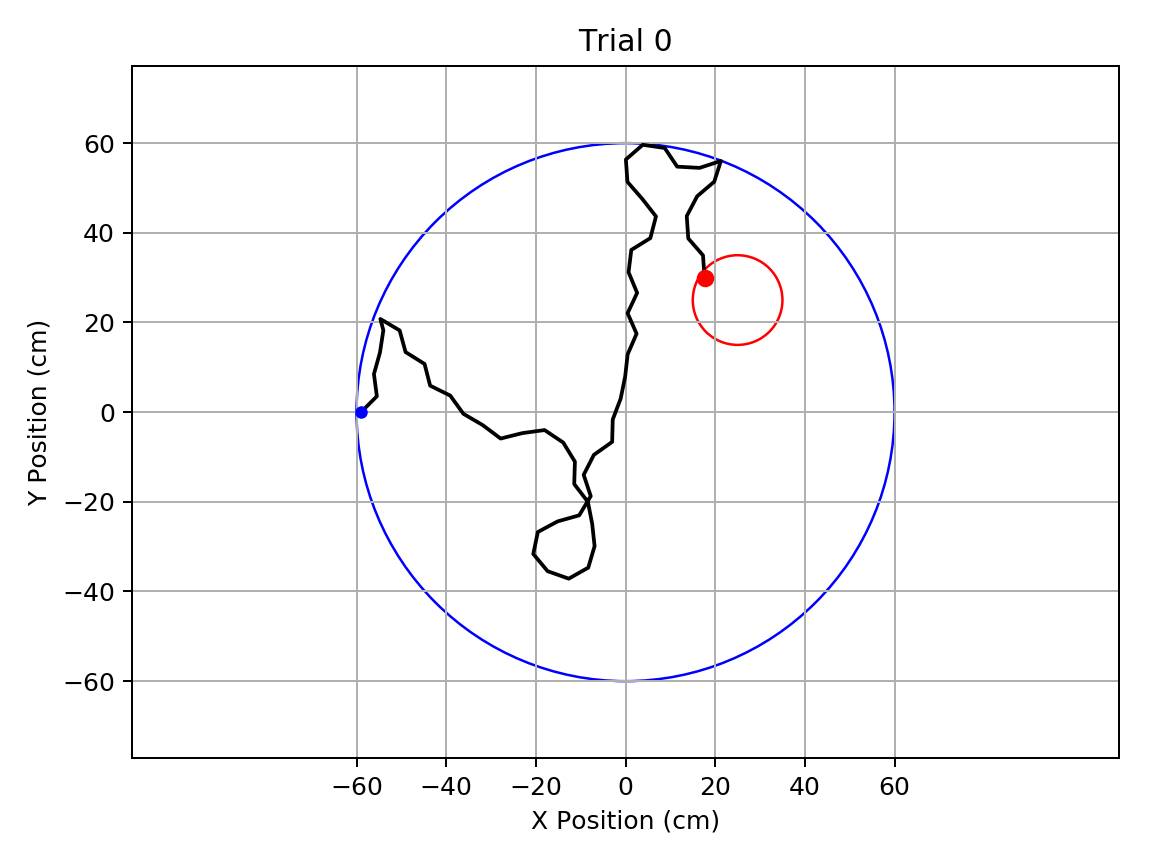

Clever rat, you found the platform in 58 seconds!


<IPython.core.display.Javascript object>


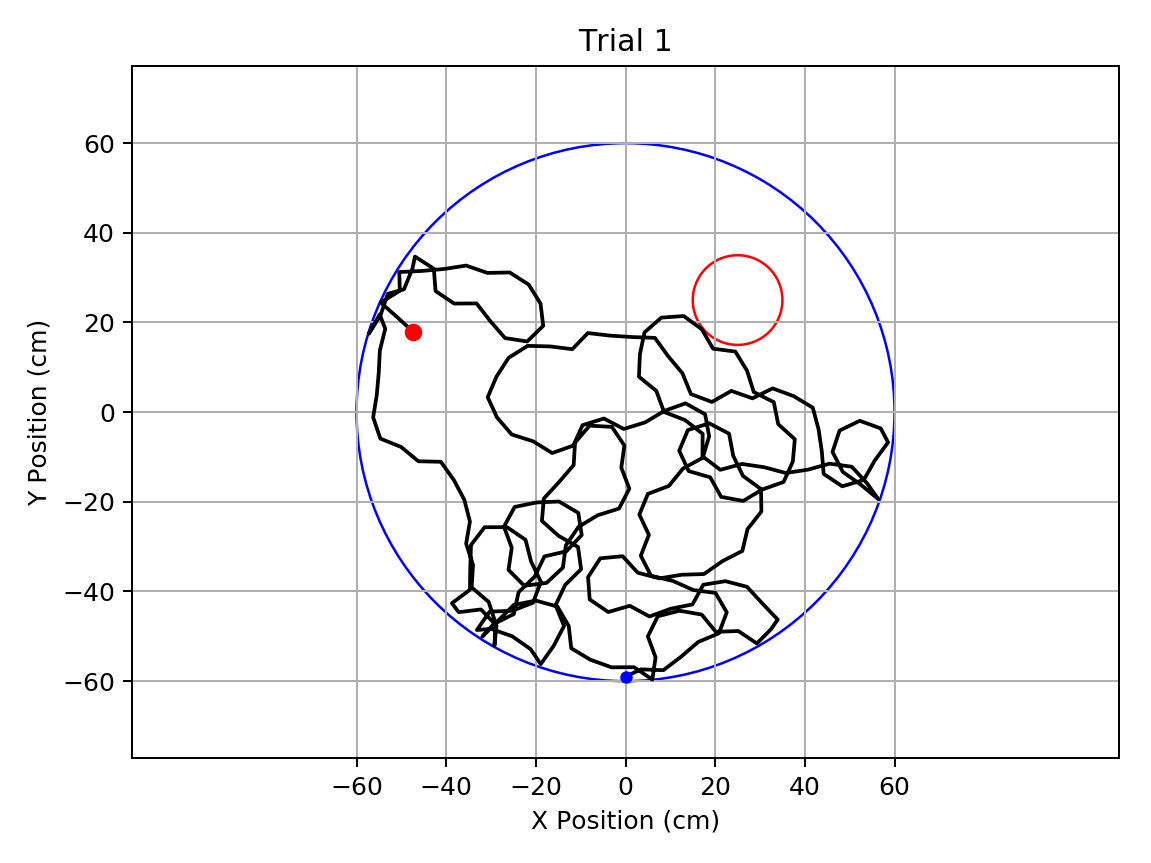

No more time for you dumb-dumb...


<IPython.core.display.Javascript object>


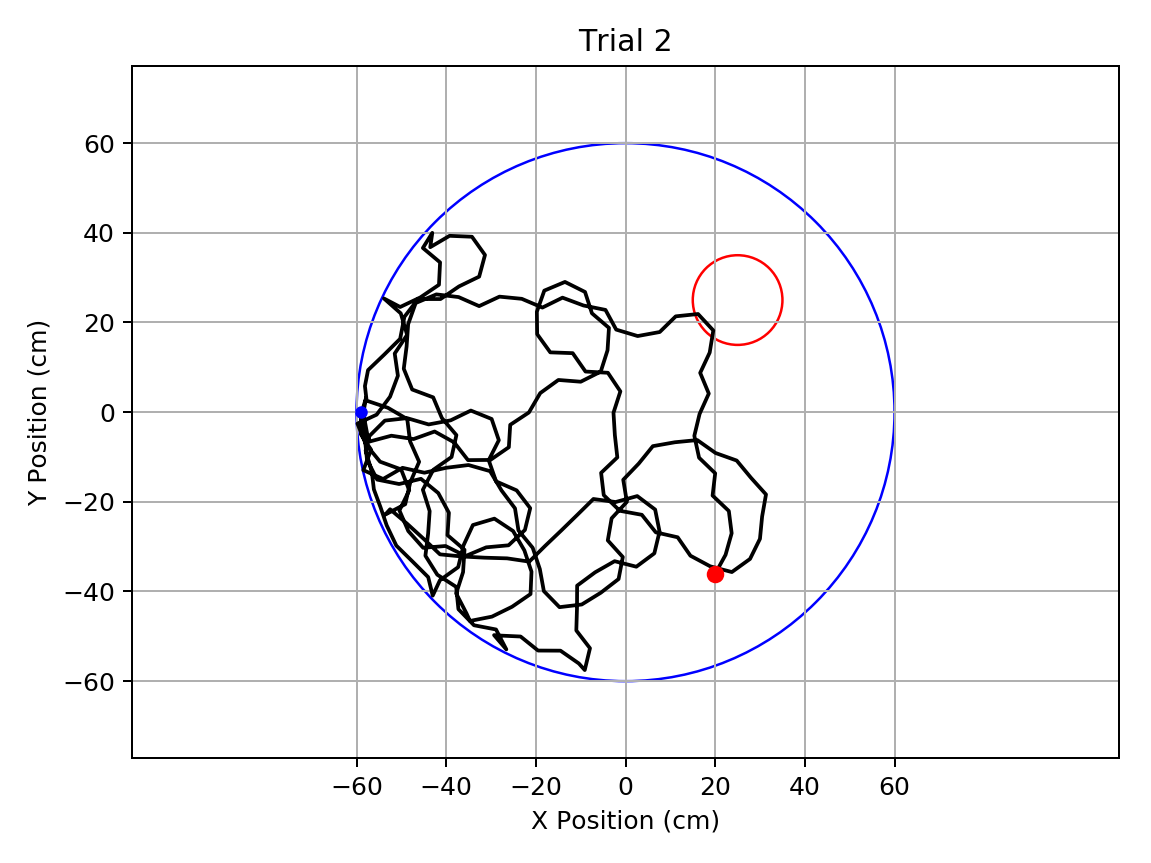

No more time for you dumb-dumb...


<IPython.core.display.Javascript object>


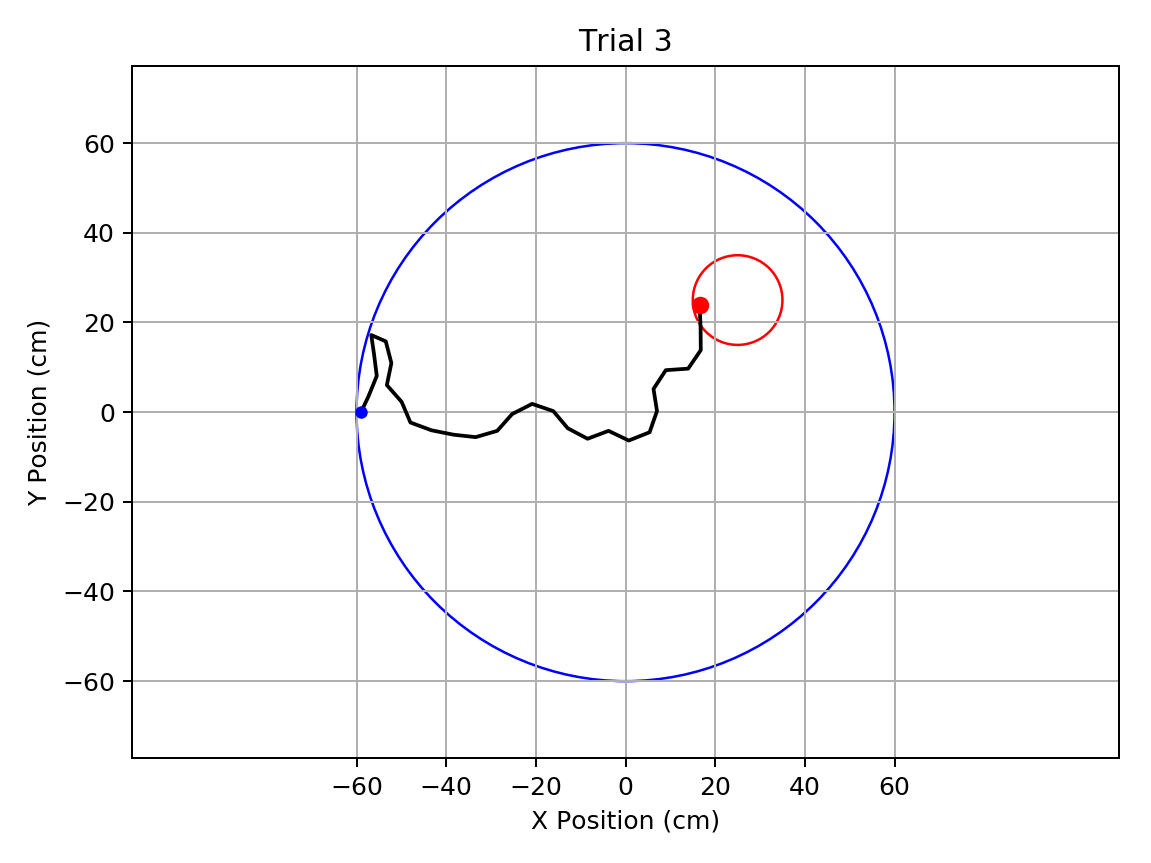

Clever rat, you found the platform in 29 seconds!


<IPython.core.display.Javascript object>


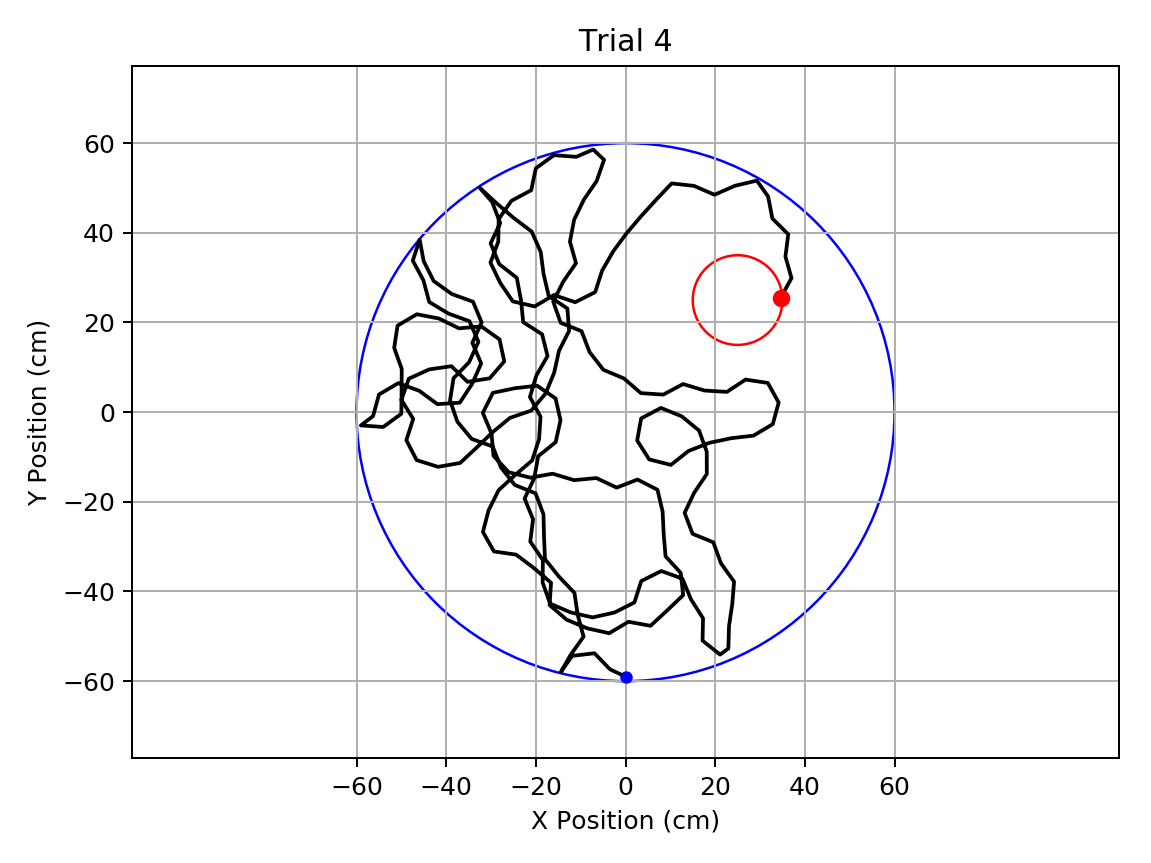

Clever rat, you found the platform in 228 seconds!


In [22]:
####################################################################################################
# Simulation with No Training
####################################################################################################

# demo of how to use the watermaze module

# create the watermaze object

def simulateNoLearning(N):
    
    for i in range(N):
        maze = watermaze()

# set the starting location
        maze.startposition()

# run forward for one trial (using random actions for sake of illustration)
        while(not maze.timeup() and not maze.atgoal()):
    
    # select a random action - this is what your actor critic network needs to provide


    
            A = np.random.randint(0,8)

    
        # move the rat
            maze.move(A)
    
    
# plot the path
        
        maze.plotpath(i+1)

# print out why the trial ended (note, if the rat reached the goal, then you must deliver a reward)
        if maze.atgoal():
            print("Clever rat, you found the platform in",maze.t,"seconds!")
        else:
            print("No more time for you dumb-dumb...")
    
    
simulateNoLearning(5)

In [46]:

class ActorCritic(object):
    
    def __init__(self, maze):
        
        self.placeFields=self.initialize_placeFields()  
        self.activity=np.zeros(len(self.placeFields))     
        self.activity=np.zeros(len(self.placeFields))       
        self.W=np.zeros(len(self.placeFields))        
        self.z=np.zeros((8,len(self.placeFields)))        
        self.maze = maze
  
    
    def initialize_placeFields(self):
        
        outside=0
        inside=0
        
        x=[]
        y=[]

        x_range=np.arange(-60, 61, 4.760)
        y_range=np.arange(-60, 61, 4.760)

        for i in x_range:
                for j in y_range:
                    if (i**2+j**2>=60**2):
                        outside=outside+1
                    else:
                        inside=inside+1
                        x.append(i)
                        y.append(j)
                
        merge=list(zip(x,y))
        
        return np.array(merge)
    
    
    def cell_firing(self,position, place_field, sigma):
        
        return np.exp(-((np.linalg.norm(position-place_field))**2 /(2*sigma**2)))
    
    
    def activity_update(self,position):
        
        activity=(np.array([self.cell_firing(position=np.array(position), place_field=np.array(list), sigma=0.16) for list in self.placeFields]))
        print(activity)
        self.activity=activity
        
    def Cp(self):
        
        return (sum(np.multiply(self.W, self.activity)))
    
    
    def actionActivity(self,move):
        
        return (sum(np.multiply(self.z[move], self.activity)))
    
    
    def actionProbability(self,move):
        
        rat_move=np.exp(2*self.actionActivity(move))
        
        list=[]
        
        for i in range(len(self.z)):
            
            list.append(np.exp(2*self.actionActivity(i)))
            
        summation=sum(list)
        
        return (rat_move/summation)
    
        
    
    
    def trial(self,N,discount_factor,plot):
        for i in range(N):
            self.maze=watermaze()
            self.maze.startposition()
            count=0
            

            while(not self.maze.timeup() and not self.maze.atgoal()):
                
                if count is not 0:

                    list=[]
                    
                    for i in range(8):
                        list.append(actorCritic.actionProbability(i))
                        
                    A = np.random.choice([0,1,2,3,4,5,6,7],1,p=list)
                    A=A[0]
                    
                else:
                    
                    A=np.random.randint(0,8)
                
                if count is not 0:
                      
                    Cpt_0=self.Cp()
                    
                self.activity=self.maze.move(A)

                Cpt_1=self.Cp()
                                           
                if count is not 0:
                    
                    if (self.maze.atgoal()):
   
                        error=1+(discount_factor*Cpt_1)-Cpt_0
                    
                    else:

                        error=0+(discount_factor*Cpt_1)-Cpt_0

                    self.W=self.W+np.multiply(error,self.activity)
                    self.z[A]=self.z[A]+np.multiply(error,self.activity)
                    
                count=count+1
                
            if plot is True:
                self.maze.plotpath()

                if self.maze.atgoal():
            
                    print("Clever rat, you found the platform in",self.maze.t,"seconds!")
                else:
                    print("No more time for you dumb-dumb...")
                    
    def exploit(self,N):
        
        for i in range(N):
            
            self.maze=watermaze()
            self.maze.startposition()
            count=0
            

            while(not self.maze.timeup() and not self.maze.atgoal()):
                
                if count is not 0:
                            
                    z=[] 
                    activities=self.maze.potentialMoves()
             
                    for i in activities:
                        
                        if sum(np.multiply(self.W, i))!=0:
                
                            if(sum(np.multiply(self.W, i))<0):
                    
                                z.append(math.log(-sum(np.multiply(self.W, i))))
                    
                            else:
                    
                                z.append(math.log(sum(np.multiply(self.W, i))))
                        else:
                
                            z.append(-1000)
                    
                    A=z.index(max(z))
                    
                    if A==0 and z[A]==-1000:           
                        A=np.random.randint(0,8)                       
                else:
                    
                    A=np.random.randint(0,8)
                
                self.activity=self.maze.move(A)         
                count=count+1
            
            self.maze.plotpath()

            if self.maze.atgoal():
            
                print("Clever rat, you found the platform in",self.maze.t,"seconds!")
            else:
                print("No more time for you dumb-dumb...")
                    

        
    
    def plot_logCp(self):
        
        count=0
        z=[]
        x=[]
        y=[]
        
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('logC(p)')

        for i in self.placeFields:
         
            activity=(np.array([self.cell_firing(position=np.array(i), place_field=np.array(list), sigma=0.16) for list in self.placeFields]))
            
            if sum(np.multiply(self.W, activity))!=0:
                
                if(sum(np.multiply(self.W, activity))<0):
                    
                    z.append(math.log(-sum(np.multiply(self.W, activity))))   
                else:
                    
                    z.append(math.log(sum(np.multiply(self.W, activity))))
            else:
                
                z.append(-1000)
                
            x.append(i[0])
            y.append(i[1])
        
        ax.set_title('log C(p) Distribution')
        plot=ax.plot_trisurf(x, y, z, linewidth=0.1, antialiased=True,cmap=cm.jet)
        
        fig.colorbar(plot, shrink=0.5, aspect=5)  
        
        
    def plot_Cp(self):
        
        count=0
        
        z=[]
        x=[]
        y=[]
        
        
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('C(p)')
              
        for i in self.placeFields:
            
            activity=(np.array([self.cell_firing(position=np.array(i), place_field=np.array(list), sigma=0.16) for list in self.placeFields]))                
            
            z.append((sum(np.multiply(self.W, activity))))
            x.append(i[0])
            y.append(i[1])
            
        ax.set_title('C(p) Distribution')
        ax.scatter(self.placeFields[:,0], self.placeFields[:,1], z)
        

<IPython.core.display.Javascript object>


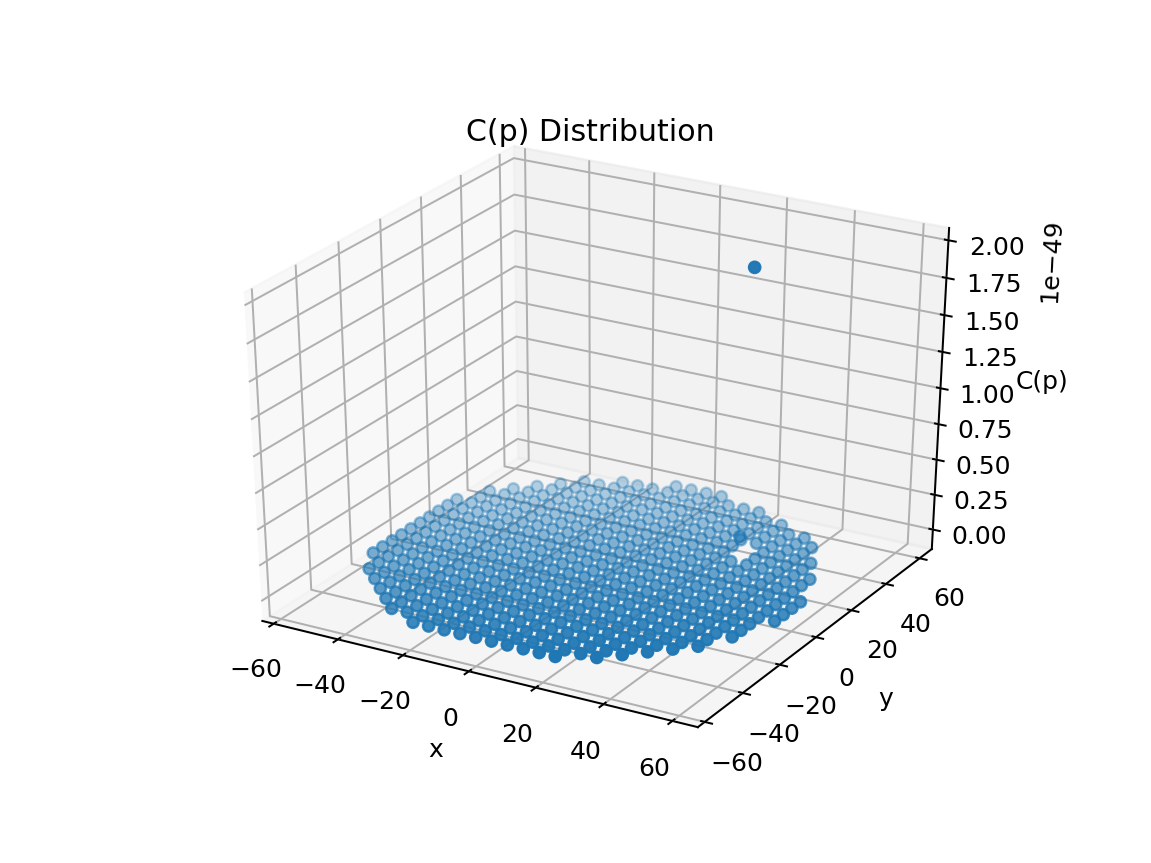

<IPython.core.display.Javascript object>


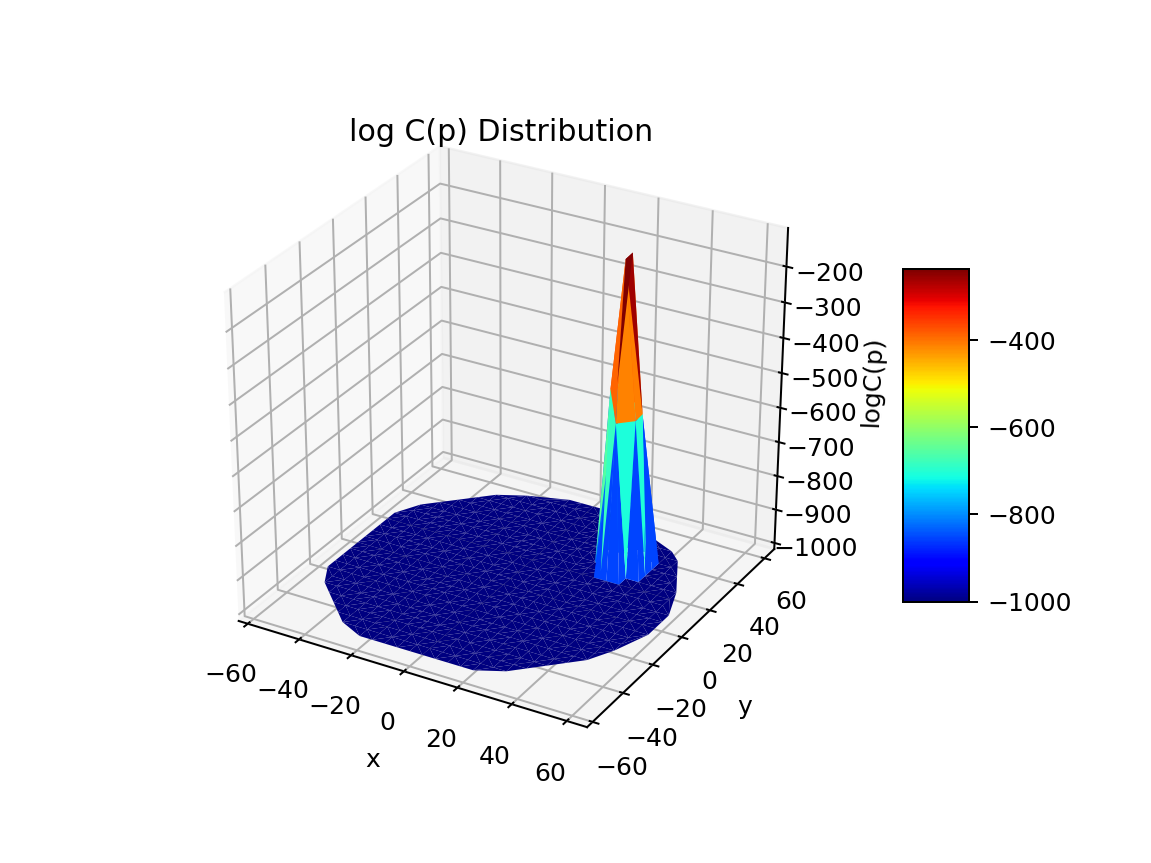

Training Time(1 trials) : 4.959805965423584 seconds


In [47]:
start = time.time()

actorCritic= ActorCritic(watermaze())

actorCritic.trial(1,1,plot=False)

actorCritic.plot_Cp()
actorCritic.plot_logCp()

end = time.time()

print("Training Time({} trials) : {} seconds".format(1,(end - start)))


<IPython.core.display.Javascript object>


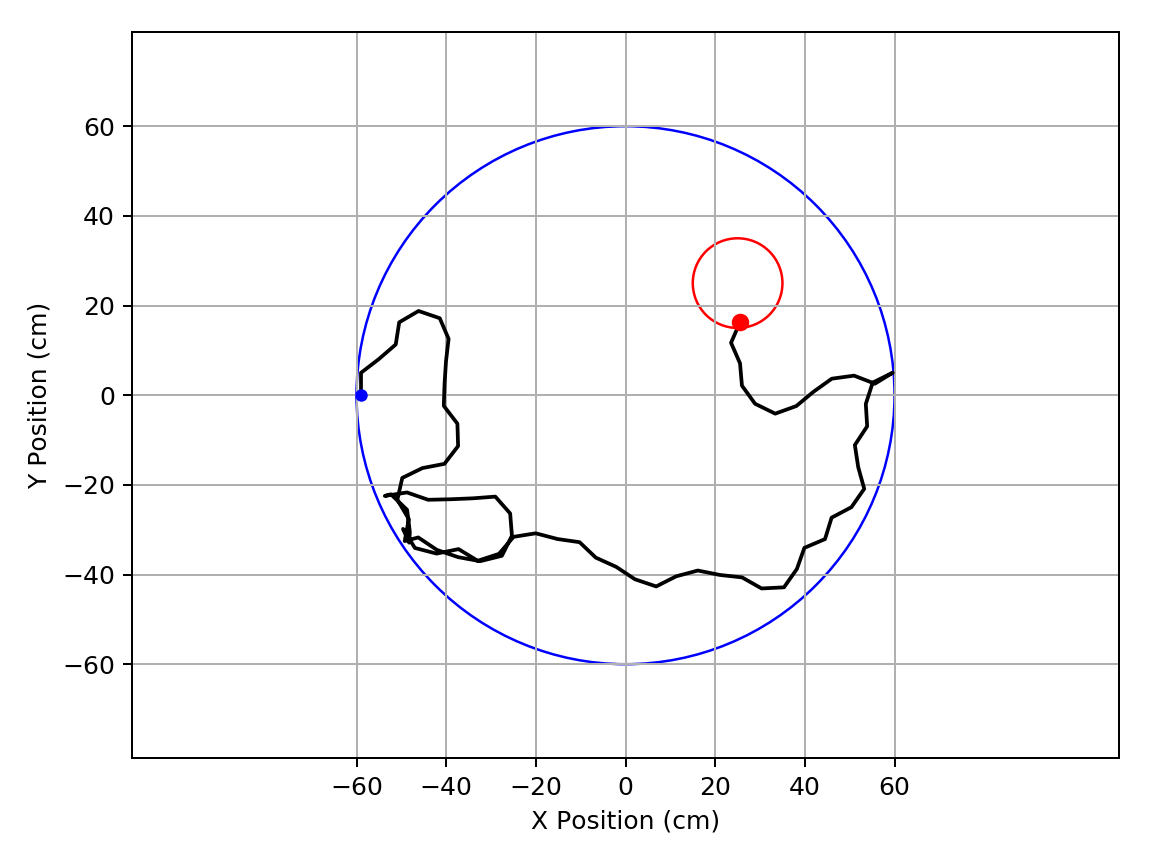

Clever rat, you found the platform in 79 seconds!


In [49]:
actorCritic.exploit(1)